In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [161]:
#helper functions
 
def sigmoid(Z):
  return 1/(1 + np.exp(-Z))

def calc_loss(Y, Y_hat):
  m = Y.shape[0]
  loss = -(np.dot(Y, np.log(Y_hat)) + np.dot(1-Y, np.log(1-Y_hat))) / m
  loss = np.squeeze(loss)
  
  return loss

def calc_accuracy(Y, Y_hat):
  correctly_classified = 0
  count = 0
  for i in range(np.size(Y_hat)):
    if Y[i] == Y_hat[i]:
      correctly_classified += 1
    count += 1

  accuracy = (correctly_classified / count) * 100
  return accuracy

# for prediction of y
def predict(X, params):
  W = params['W']
  b = params['b']
  A = sigmoid(np.dot(X, W) + b)
  
  Y = np.where(A > 0.5, 1, 0)
  return Y

# main function

def logistic_regression(X, Y, learning_rate, iterations=10000):
  np.random.seed(1)
  m, n = X.shape
  W = np.random.rand(n)
  b = 0
  losses = []
  correctness = []
  
  for i in range(iterations):
    
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    
    dZ = (A - Y.T).reshape(m)
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ) / m

    W -= learning_rate*dW
    b -= learning_rate*db

    if i % 100 == 0:
      Y_hat = np.where(A > 0.5, 1, 0)
      loss = calc_loss(Y, A)
      accuracy = calc_accuracy(Y, Y_hat)
      print('%d: (Loss: %.2f, Correctness: %.2f)'%(i, loss, accuracy))
      losses.append(loss)
      correctness.append(accuracy)

  parameters = {
      'W': W,
      'b': b
  }
  return parameters, losses, correctness

# Training the model

In [162]:
# training the model

data = pd.read_csv('https://raw.githubusercontent.com/mabhay3420/Deep-Into-CNN/master/Datasets/diabetes2.csv')
X = data.iloc[:, :8].values
Y = data.iloc[:, 8].values

for i in range(X.shape[1]):
  max = np.max(X[:,i])
  X[:,i] /= max

x_test, x_train, y_test, y_train = train_test_split(X, Y, test_size=1/5)

trained_params, losses, correctness = logistic_regression(X, Y, learning_rate = 0.06)

0: (Loss: 0.86, Correctness: 34.90)
100: (Loss: 0.62, Correctness: 65.10)
200: (Loss: 0.62, Correctness: 65.10)
300: (Loss: 0.61, Correctness: 65.23)
400: (Loss: 0.61, Correctness: 65.76)
500: (Loss: 0.60, Correctness: 66.15)
600: (Loss: 0.59, Correctness: 67.58)
700: (Loss: 0.59, Correctness: 68.23)
800: (Loss: 0.59, Correctness: 69.14)
900: (Loss: 0.58, Correctness: 69.40)
1000: (Loss: 0.58, Correctness: 69.53)
1100: (Loss: 0.57, Correctness: 70.05)
1200: (Loss: 0.57, Correctness: 70.83)
1300: (Loss: 0.57, Correctness: 71.48)
1400: (Loss: 0.56, Correctness: 72.14)
1500: (Loss: 0.56, Correctness: 72.40)
1600: (Loss: 0.56, Correctness: 72.40)
1700: (Loss: 0.55, Correctness: 72.53)
1800: (Loss: 0.55, Correctness: 72.40)
1900: (Loss: 0.55, Correctness: 72.79)
2000: (Loss: 0.55, Correctness: 73.18)
2100: (Loss: 0.54, Correctness: 73.31)
2200: (Loss: 0.54, Correctness: 73.31)
2300: (Loss: 0.54, Correctness: 73.96)
2400: (Loss: 0.54, Correctness: 74.22)
2500: (Loss: 0.54, Correctness: 74.22

#Accuracy on test data is 77.85%

In [160]:
Y_pred = predict(x_test, trained_params)

# accuracy on test data
accuracy = calc_accuracy(y_test, Y_pred)
print('accuracy on test data is: %.2f'%(accuracy))

accuracy on test data is: 77.85


#Plots of losses and correctness





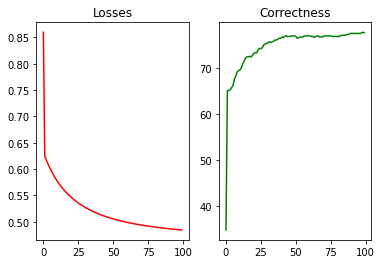

In [156]:
figure, axis = plt.subplots(1, 2)
axis[0].plot(losses, color='r')
axis[0].set_title('Losses')

axis[1].plot(correctness, color='g')
axis[1].set_title('Correctness')

plt.show()